# Predicting Kickstarter Project Success or Failure
This notebook builds a binary classification model to predict whether a Kickstarter project will succeed or fail.  
- **Target:** `state` (1 = Successful, 0 = Failed)  
- **Data:** `kickstarter_common.csv` (filtered for Successful/Failed projects)  
- **Approach:** Preprocess data, engineer features, train a model, and evaluate performance.

In [59]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [60]:
df = pd.read_csv('../data/kickstarter_common.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(2)

Shape: (331368, 14)
Columns: ['id', 'name', 'category', 'subcategory', 'country', 'launched', 'deadline', 'goal', 'pledged', 'backers', 'state', 'duration', 'launch_month', 'launch_year']


,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,duration,launch_month,launch_year
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39,4,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87,4,2009


In [61]:
# Encode Target
df['state_binary'] = df['state'].map({'Failed': 0, 'Successful': 1})

In [62]:
df.head(2)

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,duration,launch_month,launch_year,state_binary
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39,4,2009,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87,4,2009,0


<Axes: >

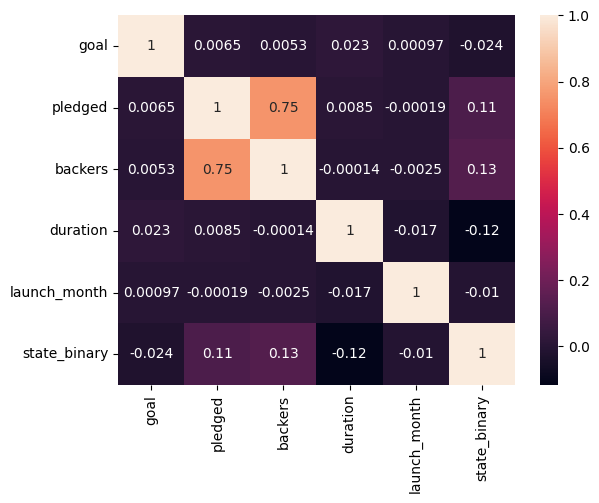

In [63]:
sns.heatmap(df[['goal', 'pledged', 'backers', 'duration', 'launch_month', 'state_binary']].corr(), annot=True)


In [64]:
df[['goal', 'backers']].describe()

,goal,backers
count,3.313680e+05,331368.000000
mean,4.119947e+04,116.485171
std,1.095625e+06,965.868090
min,1.000000e+00,0.000000
25%,2.000000e+03,2.000000
50%,5.000000e+03,15.000000
75%,1.500000e+04,63.000000
max,1.663614e+08,219382.000000


In [65]:
# Log Transform
df['log_goal'] = np.log1p(df['goal'])
df['log_backers'] = np.log1p(df['backers'])

In [66]:
df_model = df.drop(['id', 'name', 'launched', 'deadline', 'pledged', 'state', 'goal', 'backers', 'log_backers'], axis=1)
print(df_model.columns)

# Encoding categorical variables
df_model = pd.get_dummies(df_model, columns=['category', 'subcategory', 'country'], drop_first=True)

Index(['category', 'subcategory', 'country', 'duration', 'launch_month',
       'launch_year', 'state_binary', 'log_goal'],
      dtype='object')


In [67]:
# seperate features and target variable
X = df_model.drop(['state_binary'], axis=1)
y = df_model['state_binary']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (331368, 197)
y shape: (331368,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6715152246733259

Confusion Matrix:
[[31595  7916]
 [13854 12909]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74     39511
           1       0.62      0.48      0.54     26763

    accuracy                           0.67     66274
   macro avg       0.66      0.64      0.64     66274
weighted avg       0.66      0.67      0.66     66274



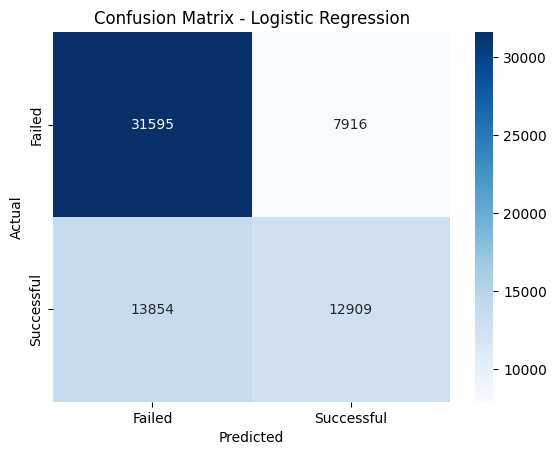

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failed', 'Successful'], yticklabels=['Failed', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()